# Day 60: Finale and road to N days of Learning and building datascience and ML/AI Projects until I get a job.

<h3>RandomForestRegression: Predicting apartement prices</h3>
<h4>The idea behind using RandomForest is to build multiple small models and aggrigate the results from these multiple models to improve the overall robustness and accuracy of the prediction.</h4>
<h4>In this project, bootstraping concept is used, each tree is not going to be built on entire dataset but on the sampled dataset which is obtained by randomly sampling from the entire training dataset with replacement and that is what we call Bootstrap aggregating in ML.</h4>

# 1.Import

In [42]:
# Data Loading 
import pickle as pickle
# Data Manipulation 
import pandas as pd
import numpy as np
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Data cleaning, sanity check and processing

In [43]:
with open('cluj_prices_lm.pkl', 'rb') as f:
    data =pickle.load(f)

In [44]:
data.shape

(161, 11)

In [45]:
data.head(3)

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,not finished,0.17,Intre Lacuri,2024,other
1,168675,3,67.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
2,177825,3,69.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other


In [46]:
data.dtypes

price_euro         int64
rooms              int64
size             float64
bathrooms          int64
terrace            int64
pass_through        bool
finished          object
height_pos       float64
neighbourhood     object
year_built         int32
zone              object
dtype: object

In [47]:
# lower casing the finished,zone and neighbourhood
data.neighbourhood = data.neighbourhood.str.lower()
data.finished = data.finished.str.lower()
data.zone = data.zone.str.lower()

In [48]:
# encoding to convert into int data type 

le =LabelEncoder()
data.neighbourhood = le.fit_transform(data.neighbourhood)
data.finished = le.fit_transform(data.finished)
data.zone = le.fit_transform(data.zone)

data.head()

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,3,0.17,8,2024,1
1,168675,3,67.0,2,2,False,3,0.17,8,2024,1
2,177825,3,69.0,2,2,False,3,0.17,8,2024,1
3,168675,3,67.0,2,2,False,3,0.17,5,2024,1
4,133725,2,53.0,1,0,True,3,0.17,8,2024,1


In [49]:
'''with open("neighbourhood_encoder.pkl", "wb") as f:
    pickle.dump(le,f)'''

'with open("neighbourhood_encoder.pkl", "wb") as f:\n    pickle.dump(le,f)'

In [50]:
data.dtypes

price_euro         int64
rooms              int64
size             float64
bathrooms          int64
terrace            int64
pass_through        bool
finished           int32
height_pos       float64
neighbourhood      int32
year_built         int32
zone               int32
dtype: object

In [51]:
# since we need categorical data not the int data type 
data.neighbourhood = data.neighbourhood.astype("category")
data.finished = data.finished.astype("category")
data.zone = data.zone.astype("category")

In [54]:
data.head()

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,3,0.17,8,2024,1
1,168675,3,67.0,2,2,False,3,0.17,8,2024,1
2,177825,3,69.0,2,2,False,3,0.17,8,2024,1
3,168675,3,67.0,2,2,False,3,0.17,5,2024,1
4,133725,2,53.0,1,0,True,3,0.17,8,2024,1


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

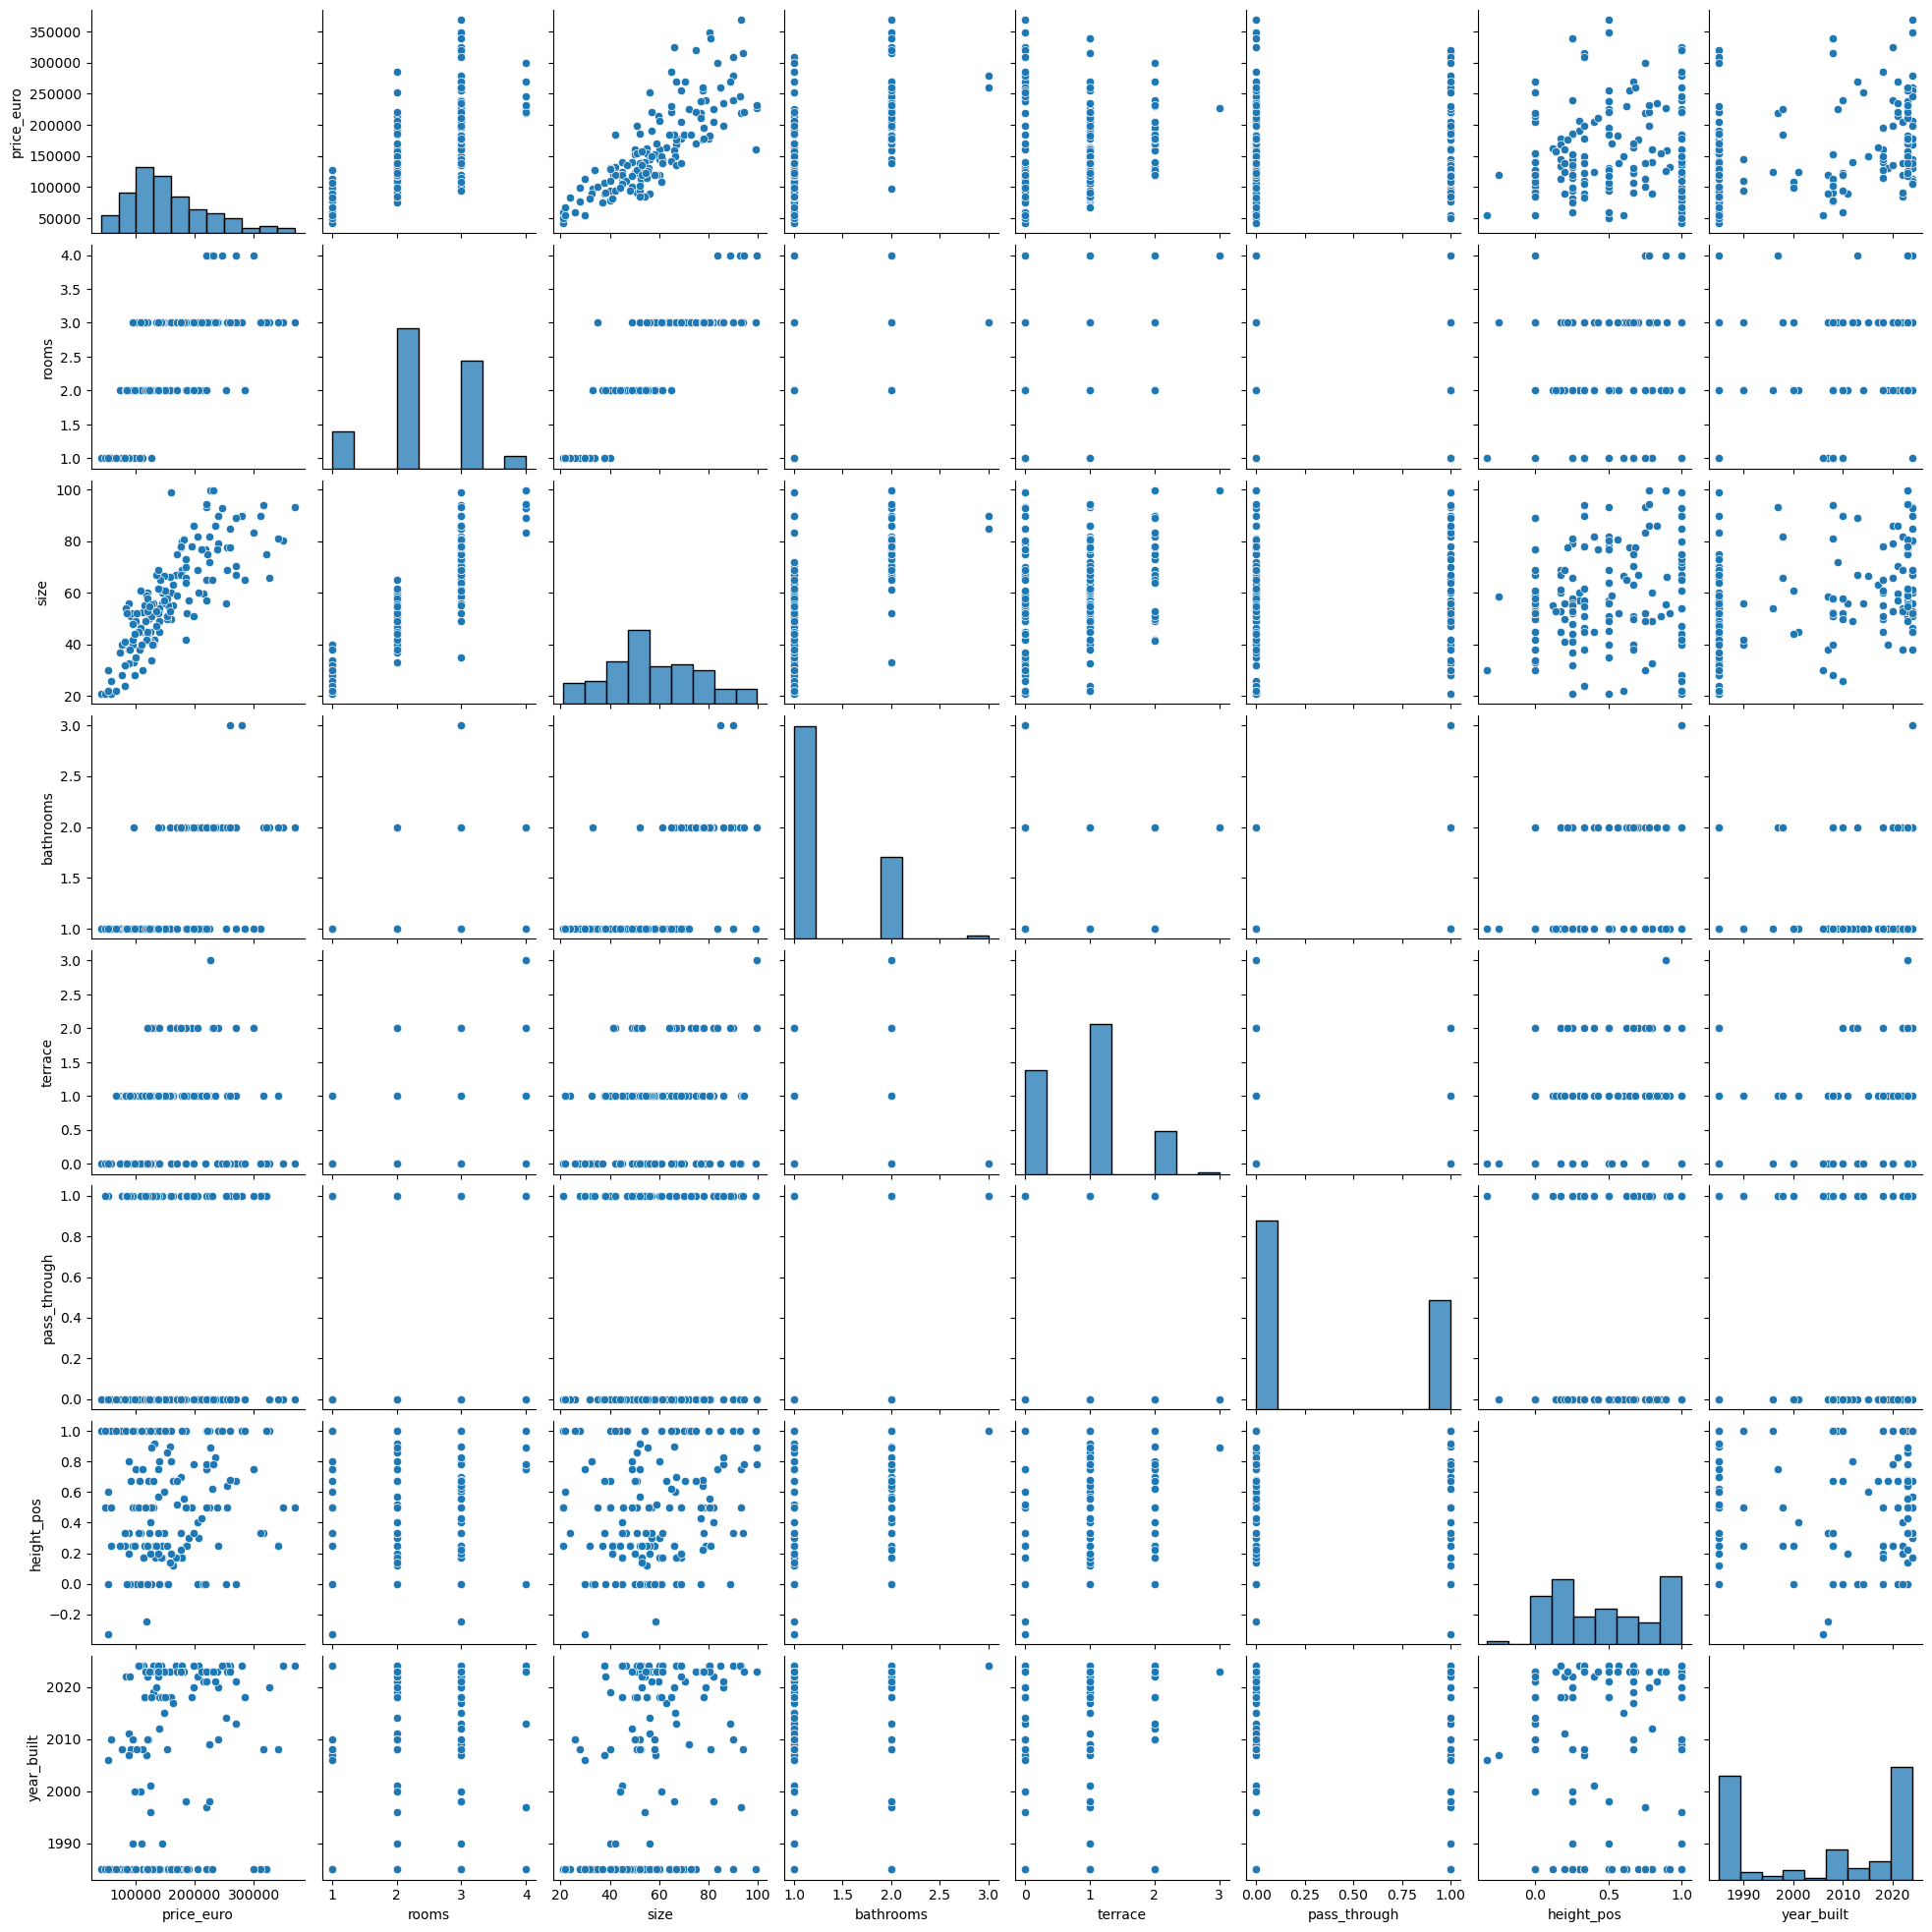

In [55]:
# lets visualize this with seaborn

sns.pairplot(data)

There are 3 points having potential being outlier and points have expensive price


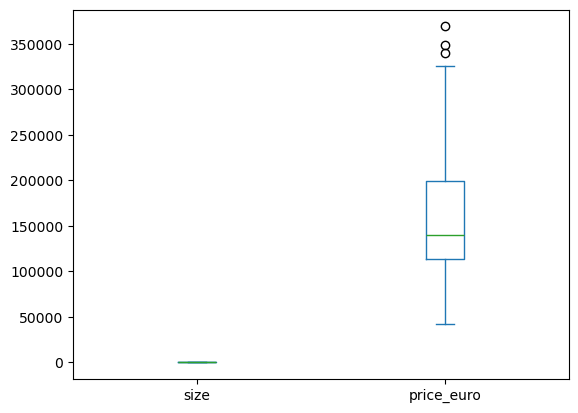

In [13]:
# for any potentials of point being outliers let's use box plot to reverify

data[['size','price_euro']].plot(kind ="box")
print("There are 3 points having potential being outlier and points have expensive price") 

In [14]:
data[(data['size'] > 90) & (data["price_euro"]<200000)] 

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
121,161000,3,99.0,1,0,True,0,1.0,2,1985,1


In [56]:
# removing the outlier dataset
data = data.drop([121])

In [16]:
log_out = list(data.price_euro.sort_index()[-3:].index)
data = data.drop(log_out)

In [57]:
# sorting the price to select the high price apartements
top_outliers = list(data.price_euro.sort_values()[-3:].index)
data = data.drop(top_outliers)
len(data)

157

In [58]:
data["price_euro_lg"] = np.log(data["price_euro"])

# 3.Train and Test sets

In [73]:
# Now it's time to train and test

# target variable
y = data.price_euro_lg
X = data[["rooms","size","bathrooms","neighbourhood","year_built"]]

In [74]:
# dividing into train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05,random_state = 4)

In [75]:
len(y_test)

8

In [76]:
print(f"We have {len(y_test)} observing for testing purposes")

We have 8 observing for testing purposes


# 4.Modeling and Hyper-parameter tuning.

<h4>2 sources of randomness in building each tree in random forest : One source is coming from sampling observation of datasamples and another source is sample predictor whch is coming from the set pf predictors. And after that multiple tree is built and aggrigated</h4>

In [77]:
# n_estimators is 100 by default 
# oob score(Out Of Bag): It is r squared indicating fit of our model
model  = RandomForestRegressor(n_estimators = 500, max_features = 3, max_samples = 60, oob_score = True)

In [78]:
# now we are ready to fit the model
rf = model.fit(X_train,y_train)

In [79]:
print(f"OOB score: {rf.oob_score_}")

OOB score: 0.7431128800232631


# 5.Varaible importance

In [80]:
rf.feature_importances_

array([0.17422593, 0.59901364, 0.0814176 , 0.09080037, 0.05454246])

In [81]:
rf.feature_names_in_

array(['rooms', 'size', 'bathrooms', 'neighbourhood', 'year_built'],
      dtype=object)

<Axes: >

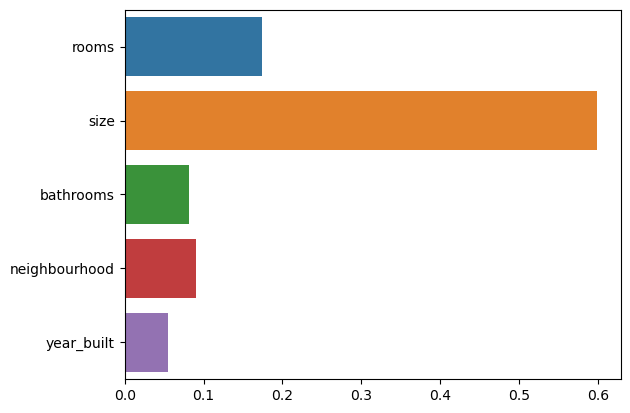

In [82]:
# let's visualize in bar plot

sns.barplot(x = rf.feature_importances_, y = rf.feature_names_in_)

# 6.Performance Evaluation

In [83]:
pred_price = rf.predict(X_test)

In [84]:
#y_test
pred_price

array([11.95948178, 11.82687723, 11.76767666, 12.02915662, 12.04111411,
       11.86207587, 11.78678012, 11.850188  ])

In [85]:
# mean absolute error

mae = mean_absolute_error(y_true = np.exp(y_test), y_pred = np.exp(pred_price))
print(f"Mean Absolute Error(MAE): {mae}")

Mean Absolute Error(MAE): 26633.147189009414


In [86]:
mse = mean_squared_error(y_true = np.exp(y_test), y_pred = np.exp(pred_price))
rmse = math.sqrt(mse)
print(f"Mean Squared Error(MAE): {rmse}")

Mean Squared Error(MAE): 44334.49242939148


<Axes: xlabel='price_euro_lg', ylabel='price_euro_lg'>

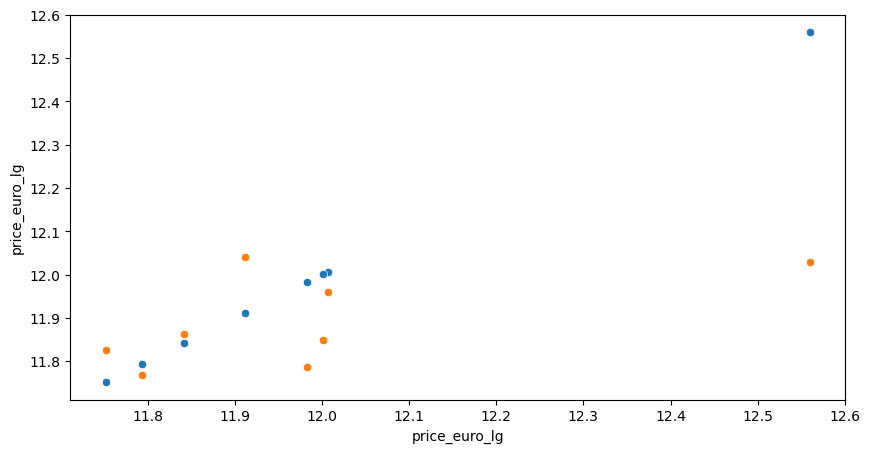

In [87]:
# check how are the predictions are

fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = y_test, y = y_test, ax = ax)
sns.scatterplot(x = y_test, y = pred_price, ax = ax)

<Axes: xlabel='price_euro_lg', ylabel='price_euro_lg'>

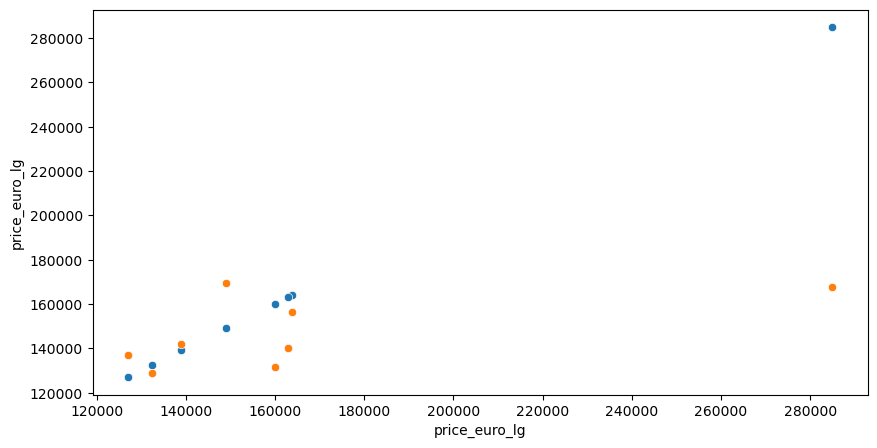

In [88]:
# check how are the predictions are

fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = np.exp(y_test), y = np.exp(y_test), ax = ax)
sns.scatterplot(x = np.exp(y_test), y = np.exp(pred_price), ax = ax)

# 7.Re-iterate

# 8.Save model for later use

In [89]:
#saving as pickle file
with open("RandomforestApartmentPrice.pkl", "wb") as f:
    pickle.dump(rf, f)

In [90]:
with open("RandomforestApartmentPrice.pkl", "rb") as f:
    rf = pickle.load(f)